In [80]:
import pyscheduling.SMSP.risijCmax as sm_cmax
import pyscheduling.SMSP.riwiCi as sm_ci
import pyscheduling.SMSP.risijwiFi as sm_fi
import pyscheduling.SMSP.SM_Methods as sm_methods
import pyscheduling.SMSP.SingleMachine as sm

%load_ext autoreload
%load_ext pycodestyle_magic
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


## New problem risijwiCi

In [2]:
instance = sm.risijwiCi_Instance.generate_random(40, Wmax=2)

In [3]:
results_dict = {}
for rule_number in range(4):
    obj = sm.Heuristics.list_heuristic(instance, rule_number, False).best_solution.objective_value
    obj_reverse = sm.Heuristics.list_heuristic(instance, rule_number, True).best_solution.objective_value
    
    results_dict[f'Rule_{rule_number}'] = obj
    results_dict[f'Rule_{rule_number}-reverse'] = obj_reverse 
    
print(results_dict)

{'Rule_0': 116707, 'Rule_0-reverse': 158641, 'Rule_1': 178602, 'Rule_1-reverse': 89481, 'Rule_2': 174794, 'Rule_2-reverse': 91357, 'Rule_3': 167930, 'Rule_3-reverse': 104192}


In [4]:
solve_result_grasp = sm_methods.Heuristics.grasp(instance, 0, 0.2, 5)

In [5]:
solve_result_biba = sm_methods.Heuristics.BIBA(instance)

In [6]:
solve_result_list = sm.Heuristics.list_heuristic(instance, rule_number=1)

In [7]:
solve_result_lahc = sm_methods.Metaheuristics.lahc(instance, **{"time_limit_factor":0.2})

In [8]:
solve_result_sa = sm_methods.Metaheuristics.SA(instance, **{"time_limit_factor":0.2})

In [9]:
print(solve_result_lahc.best_solution)

Objective : 82015
Job_schedule (job_id , start_time , completion_time) | objective
(19, 2, 13) : (16, 41, 59) : (15, 81, 91) : (29, 118, 132) : (26, 168, 194) : (20, 225, 236) : (0, 258, 284) : (27, 313, 326) : (22, 363, 397) : (18, 445, 461) : (7, 508, 543) : (3, 594, 619) : (2, 652, 663) : (17, 688, 720) : (36, 748, 760) : (30, 785, 809) : (8, 859, 886) : (1, 939, 965) : (23, 1011, 1031) : (9, 1071, 1091) : (4, 1117, 1128) : (11, 1153, 1192) : (33, 1274, 1319) : (10, 1355, 1373) : (37, 1412, 1454) : (28, 1483, 1497) : (35, 1525, 1560) : (14, 1621, 1643) : (39, 1693, 1740) : (21, 1788, 1812) : (12, 1871, 1920) : (13, 1983, 2006) : (6, 2052, 2075) : (5, 2135, 2184) : (31, 2267, 2302) : (25, 2365, 2394) : (24, 2448, 2474) : (32, 2526, 2554) : (34, 2622, 2657) : (38, 2746, 2794) | 82015


## Old problem riwiCi

In [17]:
instance = sm_ci.riwiCi_Instance.generate_random(10)

In [18]:
solve_result = sm_methods.Heuristics_Cmax.grasp(instance, 0.5, 0.5, 5)

In [19]:
%%timeit
solve_result_1 = sm_ci.Heuristics.WSAPT(instance)

In [40]:
%%timeit
rule = lambda instance, job_id : float(instance.W[job_id])/float(instance.P[job_id])
filter_fun = lambda instance, ci, job_id : instance.R[job_id]<=ci
solve_result_2 = sm_methods.Heuristics.dynamic_dispatch_rule(instance,rule, filter_fun, reverse=True)

84.6 µs ± 910 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [31]:
print(solve_result_1)
print(solve_result_2)

Search stopped with status : FEASIBLE
 Solution is : 
 Objective : 2055
Job_schedule (job_id , start_time , completion_time) | objective
(6, 0, 2) : (0, 7, 66) : (5, 66, 88) : (7, 88, 113) : (9, 113, 152) : (1, 152, 195) : (8, 195, 255) : (2, 255, 317) : (4, 317, 387) : (3, 387, 480) | 2055 
Runtime is : 6.069301161915064e-05s 
time to best is : -1s 

Search stopped with status : FEASIBLE
 Solution is : 
 Objective : 2055
Job_schedule (job_id , start_time , completion_time) | objective
(6, 0, 2) : (0, 7, 66) : (5, 66, 88) : (7, 88, 113) : (9, 113, 152) : (1, 152, 195) : (8, 195, 255) : (2, 255, 317) : (4, 317, 387) : (3, 387, 480) | 2055 
Runtime is : 0.0002623129985295236s 
time to best is : -1s 



## Refactored compute_objective methods

In [49]:
instance = sm_cmax.risijCmax_Instance.generate_random(20)

In [50]:
lahc_sol = sm_methods.Metaheuristics.lahc(instance, n_iterations=10)

Calling LEJ_neighbour
Applying LEJ insert
Calling LEJ_neighbour
Applying LEJ swap
Calling LEJ_neighbour
Applying LEJ swap
Calling LEJ_neighbour
Applying LEJ insert
Calling LEJ_neighbour
Applying LEJ swap
Calling LEJ_neighbour
Applying LEJ swap
Calling LEJ_neighbour
Applying LEJ swap
Calling LEJ_neighbour
Applying LEJ insert
Calling LEJ_neighbour
Applying LEJ swap
Calling LEJ_neighbour
Applying LEJ insert


In [22]:
lahc_sol.best_solution.machine.job_schedule

[Job(id=12, start_time=14, end_time=43),
 Job(id=3, start_time=43, end_time=88),
 Job(id=0, start_time=88, end_time=163),
 Job(id=13, start_time=163, end_time=281),
 Job(id=8, start_time=281, end_time=329),
 Job(id=15, start_time=329, end_time=421),
 Job(id=5, start_time=421, end_time=524),
 Job(id=18, start_time=524, end_time=588),
 Job(id=10, start_time=588, end_time=628),
 Job(id=7, start_time=628, end_time=701),
 Job(id=9, start_time=701, end_time=798),
 Job(id=14, start_time=798, end_time=888),
 Job(id=19, start_time=888, end_time=988),
 Job(id=17, start_time=988, end_time=1091),
 Job(id=4, start_time=1091, end_time=1217),
 Job(id=6, start_time=1217, end_time=1323),
 Job(id=11, start_time=1323, end_time=1403),
 Job(id=16, start_time=1403, end_time=1510),
 Job(id=2, start_time=1510, end_time=1563),
 Job(id=1, start_time=1563, end_time=1656)]

In [52]:
lahc_sol.best_solution.is_valid()

True

In [24]:
19 + instance.S[8][14], instance.R[14], instance.P[14]

(90, 39, 39)

In [53]:
biba_sol = sm_methods.Heuristics.BIBA(instance)

In [54]:
biba_sol.best_solution.objective_value

1364

## wiFi objective

In [120]:
instance = sm_fi.risijwiFi_Instance.generate_random(20)

In [121]:
instance

risijwiFi_Instance(n=20)
(instance_name=)
(P=[15, 20, 31, 37, 21, 18, 21, 29, 22, 18, 15, 49, 19, 49, 25, 40, 16, 17, 35, 49])
(W=[1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2])
(R=[21, 24, 60, 12, 27, 16, 4, 35, 3, 20, 9, 11, 16, 22, 22, 77, 21, 24, 46, 21])
(S=[[0, 35, 46, 47, 31, 31, 40, 31, 39, 33, 30, 74, 31, 46, 49, 39, 30, 33, 34, 33], [32, 0, 53, 51, 40, 39, 40, 56, 41, 37, 30, 67, 38, 70, 44, 41, 35, 35, 56, 60], [39, 48, 0, 62, 43, 47, 53, 60, 55, 37, 59, 94, 47, 74, 58, 68, 45, 57, 67, 70], [43, 70, 63, 0, 53, 37, 73, 58, 45, 56, 72, 84, 55, 84, 50, 74, 69, 53, 70, 75], [38, 40, 46, 69, 0, 37, 42, 52, 42, 39, 37, 78, 39, 61, 44, 48, 33, 37, 53, 44], [33, 37, 40, 71, 39, 0, 40, 44, 40, 36, 33, 67, 37, 48, 36, 41, 33, 34, 65, 51], [34, 40, 44, 62, 42, 36, 0, 48, 42, 39, 32, 79, 38, 65, 48, 78, 32, 35, 60, 72], [31, 56, 61, 59, 47, 56, 49, 0, 44, 53, 33, 70, 43, 58, 57, 75, 55, 56, 58, 76], [40, 43, 60, 63, 43, 38, 42, 44, 0, 40, 36, 85, 39, 52, 47, 61, 36, 35, 50

In [129]:
biba_sol = sm_methods.Heuristics.BIBA(instance)

In [130]:
biba_sol.best_solution

Objective : 14597
Job_schedule (job_id , start_time , completion_time) | objective
(6, 4, 25) : (10, 25, 72) : (9, 72, 120) : (16, 120, 168) : (14, 168, 228) : (5, 228, 285) : (1, 285, 342) : (8, 342, 405) : (17, 405, 457) : (7, 457, 530) : (0, 530, 576) : (4, 576, 628) : (19, 628, 721) : (2, 721, 833) : (12, 833, 899) : (15, 899, 983) : (18, 983, 1088) : (3, 1088, 1198) : (11, 1198, 1331) : (13, 1331, 1478) | 14597

In [131]:
lahc_sol = sm_methods.Metaheuristics.lahc(instance, n_iterations=10)

Objective : 14440
Job_schedule (job_id , start_time , completion_time) | objective
(6, 4, 25) : (16, 25, 73) : (1, 73, 130) : (10, 130, 175) : (9, 175, 223) : (14, 223, 284) : (5, 284, 341) : (8, 341, 403) : (7, 403, 476) : (4, 476, 544) : (19, 544, 637) : (0, 637, 688) : (18, 688, 757) : (12, 757, 827) : (17, 827, 881) : (3, 881, 954) : (2, 954, 1048) : (15, 1048, 1156) : (11, 1156, 1285) : (13, 1285, 1432) | 14440


In [127]:
lahc_sol.all_solutions

[Objective : 14440
 Job_schedule (job_id , start_time , completion_time) | objective
 (6, 4, 25) : (16, 25, 73) : (1, 73, 130) : (10, 130, 175) : (9, 175, 223) : (14, 223, 284) : (5, 284, 341) : (8, 341, 403) : (7, 403, 476) : (4, 476, 544) : (19, 544, 637) : (0, 637, 688) : (18, 688, 757) : (12, 757, 827) : (17, 827, 881) : (3, 881, 954) : (2, 954, 1048) : (15, 1048, 1156) : (11, 1156, 1285) : (13, 1285, 1432) | 14440,
 Objective : 14713
 Job_schedule (job_id , start_time , completion_time) | objective
 (8, 3, 25) : (16, 25, 77) : (5, 77, 127) : (1, 127, 184) : (10, 184, 229) : (9, 229, 277) : (14, 277, 338) : (0, 338, 390) : (7, 390, 450) : (12, 450, 512) : (17, 512, 566) : (6, 566, 626) : (2, 626, 701) : (4, 701, 765) : (19, 765, 858) : (15, 858, 980) : (18, 980, 1085) : (3, 1085, 1195) : (13, 1195, 1328) : (11, 1328, 1475) | 14713]

In [132]:
LS = sm.SM_LocalSearch()
new_sol = LS.improve(biba_sol.best_solution)

## PMSP example

In [145]:
import pyscheduling.PMSP.RmriSijkCmax as pmsp_ri
from pyscheduling.PMSP.PM_methods import Metaheuristics_Cmax

In [140]:
instance = pmsp_ri.RmriSijkCmax_Instance.generate_random(20, 2)

In [150]:
lahc_solve_result = Metaheuristics_Cmax.lahc(instance, n_iterations = 50)

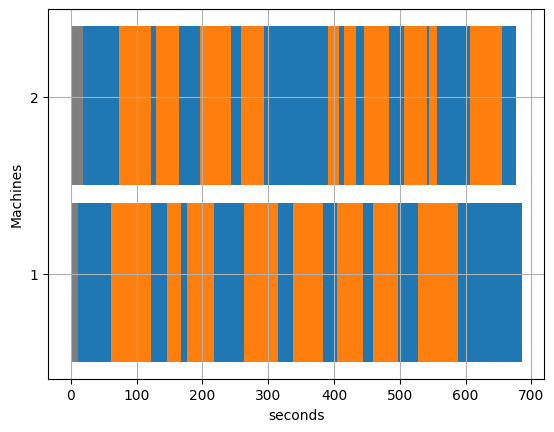

In [152]:
lahc_solve_result.best_solution.plot("gantt.png")